In [1]:
import numpy as np
import jupyter_helper
import QUANTAXIS as QA
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
import os
import sys
import talib
import pandas as pd
from talib import MA_Type
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from finance_ai_py import quantaxis_ext


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\empyrical\utils.py:32: UserWarning: Unable to import pandas_datareader. Suppressing import error and continuing. All data reading functionality will raise errors; but has been deprecated and will be removed in a later version.
  warnings.warn(msg)


In [2]:
s,e=jupyter_helper.get_start_end_date()
benchmark_code=jupyter_helper.get_benchmark_code()
stock_code='600436'

## 原始数据

In [3]:
stock_data=QA.QA_fetch_stock_day_adv(stock_code,s,e)

In [4]:
# # 相对强弱指标
# stock_df['rsi'] = talib.RSI(
#     np.array(stock_df['close']))
# # 指数平均数指标(Exponential Moving Average，EXPMA或EMA)
# stock_df['ema'] = talib.EMA(np.array(stock_df['close']))
# # 三重指数平滑移动平均 Triple Exponential Moving Average (T3)
# stock_df['t3'] = talib.T3(np.array(stock_df['close']))
# # TEMA - Triple Exponential Moving Average
# stock_df['t3'] = talib.TEMA(np.array(stock_df['close']))
# #随机指标
# stock_df['slowk'], stock_df['slowd'] = talib.STOCH(np.array(
#     stock_df['high']), np.array(stock_df['low']), np.array(stock_df['close']))
# stock_df['fastk'], stock_df['fastd'] = talib.STOCHF(np.array(
#     stock_df['high']), np.array(stock_df['low']), np.array(stock_df['close']))
# #DMI指标
# stock_df['dmi']=talib.DX(np.array(
#     stock_df['high']), np.array(stock_df['low']), np.array(stock_df['close']))
# #MACD指标
# stock_df['macd'], stock_df['macdsignal'], stock_df['macdhist'] = talib.MACD(np.array(stock_df['close']))
# #能量潮（OBV)
# stock_df['obv'] = talib.OBV(np.array(stock_df['close']), np.array(stock_df['volume']))
# #顺势指标(Commodity Channel Index，简称CCI)
# stock_df['cci']=talib.CCI(np.array(
#     stock_df['high']), np.array(stock_df['low']), np.array(stock_df['close']))
# #变动率
# stock_df['roc'] = talib.ROC(np.array(stock_df['close']))
# #威廉指数
# stock_df['willr']=talib.WILLR(np.array(
#     stock_df['high']), np.array(stock_df['low']), np.array(stock_df['close']))

# BRARCR VR（成交量变异率
# 振动升降指标
# 简易波动指标
# SAR（停损点）
# 随机指标（KDJ指标）

## 使用talib加工后的数据

In [5]:
stock_df = stock_data.to_qfq().data
stock_df['o_close'] = stock_data.data['close']
# stock_df['high_qfq'] = stock_data.to_qfq().data['high']
# stock_df['low_hfq'] = stock_data.to_hfq().data['low']

close = np.array(stock_df['close'])
high = np.array(stock_df['high'])
low = np.array(stock_df['low'])
_open = np.array(stock_df['open'])
_volume = np.array(stock_df['volume'])

stock_df['dema'] = talib.DEMA(close)
stock_df['ema'] = talib.EMA(close)
stock_df['ht_tradeline'] = talib.HT_TRENDLINE(close)
stock_df['kama'] = talib.KAMA(close)
stock_df['ma'] = talib.MA(close)
stock_df['mama'], stock_df['fama'] = talib.MAMA(close)
# MAVP
stock_df['midpoint'] = talib.MIDPOINT(close)
stock_df['midprice'] = talib.MIDPRICE(high, low)
stock_df['sar'] = talib.SAR(high, low)
stock_df['sarext'] = talib.SAREXT(high, low)
stock_df['sma'] = talib.SMA(close)
stock_df['t3'] = talib.T3(close)
stock_df['tema'] = talib.TEMA(close)
stock_df['trima'] = talib.TRIMA(close)
stock_df['wma'] = talib.WMA(close)

stock_df['adx'] = talib.ADX(high, low, close)
stock_df['adxr'] = talib.ADXR(high, low, close)
stock_df['apo'] = talib.APO(close)

stock_df['aroondown'], stock_df['aroonup'] = talib.AROON(high, low)
stock_df['aroonosc'] = talib.AROONOSC(high, low)
stock_df['bop'] = talib.BOP(_open, high, low, close)
stock_df['cci'] = talib.CCI(high, low, close)
stock_df['cmo'] = talib.CMO(close)
stock_df['dx'] = talib.DX(high, low, close)
# MACD
stock_df['macd'], stock_df['macdsignal'], stock_df['macdhist'] = talib.MACDEXT(
    close)
# MACDFIX
stock_df['mfi'] = talib.MFI(high, low, close, _volume)
stock_df['minus_di'] = talib.MINUS_DI(high, low, close)
stock_df['minus_dm'] = talib.MINUS_DM(high, low)
stock_df['mom'] = talib.MOM(close)
stock_df['plus_di'] = talib.PLUS_DI(high, low, close)
stock_df['plus_dm'] = talib.PLUS_DM(high, low)
stock_df['ppo'] = talib.PPO(close)
stock_df['roc'] = talib.ROC(close)
stock_df['rocp'] = talib.ROCP(close)
stock_df['rocr'] = talib.ROCR(close)
stock_df['rocr100'] = talib.ROCR100(close)
stock_df['rsi'] = talib.RSI(close)
stock_df['slowk'], stock_df['slowd'] = talib.STOCH(high, low, close)
stock_df['fastk'], stock_df['fastd'] = talib.STOCHF(high, low, close)
# STOCHRSI - Stochastic Relative Strength Index
stock_df['trix'] = talib.TRIX(close)
stock_df['ultosc'] = talib.ULTOSC(high, low, close)
stock_df['willr'] = talib.WILLR(high, low, close)

stock_df['ad'] = talib.AD(high, low, close, _volume)
stock_df['adosc'] = talib.ADOSC(high, low, close, _volume)
stock_df['obv'] = talib.OBV(close, _volume)


stock_df['ht_dcperiod'] = talib.HT_DCPERIOD(close)
stock_df['ht_dcphase'] = talib.HT_DCPHASE(close)
stock_df['inphase'], stock_df['quadrature'] = talib.HT_PHASOR(close)
stock_df['sine'], stock_df['leadsine'] = talib.HT_PHASOR(close)
stock_df['ht_trendmode'] = talib.HT_TRENDMODE(close)

stock_df['avgprice'] = talib.AVGPRICE(_open, high, low, close)
stock_df['medprice'] = talib.MEDPRICE(high, low)
stock_df['typprice'] = talib.TYPPRICE(high, low, close)
stock_df['wclprice'] = talib.WCLPRICE(high, low, close)


stock_df['atr'] = talib.ATR(high, low, close)
stock_df['natr'] = talib.NATR(high, low, close)
stock_df['trange'] = talib.TRANGE(high, low, close)

stock_df['beta'] = talib.BETA(high, low)
stock_df['correl'] = talib.CORREL(high, low)
stock_df['linearreg'] = talib.LINEARREG(close)
stock_df['linearreg_angle'] = talib.LINEARREG_ANGLE(close)
stock_df['linearreg_intercept'] = talib.LINEARREG_INTERCEPT(close)
stock_df['linearreg_slope'] = talib.LINEARREG_SLOPE(close)
stock_df['stddev'] = talib.STDDEV(close)
stock_df['tsf'] = talib.TSF(close)
stock_df['var'] = talib.VAR(close)

stock_df = stock_df.reset_index().set_index('date')
# stock_df = stock_df.drop(columns=['code', 'open', 'high', 'low'])
stock_df = stock_df.dropna()
stock_df

,code,open,high,low,close,volume,amount,preclose,adj,o_close,...,trange,beta,correl,linearreg,linearreg_angle,linearreg_intercept,linearreg_slope,stddev,tsf,var
date,,,,,,,,,,,,,,,,,,,,,
2005-05-26,600436,2.372304,2.402822,2.240599,2.324120,84524.360438,19457924.0,2.372304,0.160616,14.47,...,0.162223,-0.552440,0.950422,2.363539,-0.518165,2.481111,-0.009044,0.039599,2.354495,0.001568
2005-05-27,600436,2.324120,2.357849,2.280753,2.351424,60678.728405,14134526.0,2.324120,0.160616,14.64,...,0.077096,-0.825717,0.944819,2.364090,-0.385898,2.451649,-0.006735,0.031784,2.357355,0.001010
2005-05-30,600436,2.351424,2.465889,2.338343,2.464253,51436.985271,12418859.0,2.351424,0.163520,15.07,...,0.127546,0.296196,0.937758,2.385669,-0.199986,2.431045,-0.003490,0.050048,2.382179,0.002505
2005-05-31,600436,2.459348,2.472430,2.428279,2.451172,43413.524960,10605036.0,2.464253,0.163520,14.99,...,0.044151,0.420653,0.923980,2.396117,-0.137319,2.427274,-0.002397,0.055429,2.393721,0.003072
2005-06-01,600436,2.444631,2.460983,2.395575,2.446266,24847.042106,6006451.0,2.451172,0.163520,14.96,...,0.065408,0.541952,0.912049,2.405345,-0.076252,2.422646,-0.001331,0.057841,2.404014,0.003346
2005-06-02,600436,2.444631,2.444631,2.225514,2.302368,89254.880516,20552352.0,2.446266,0.163520,14.08,...,0.220753,0.598194,0.891961,2.377110,-0.252789,2.434466,-0.004412,0.064391,2.372698,0.004146
2005-06-03,600436,2.276205,2.379223,2.240230,2.367776,20382.769220,4695850.0,2.302368,0.163520,14.48,...,0.138992,0.574145,0.878745,2.377237,-0.184097,2.419007,-0.003213,0.062057,2.374024,0.003851
2005-06-06,600436,2.294192,2.526391,2.294192,2.524756,50489.091712,12322044.0,2.367776,0.163520,15.44,...,0.232199,0.453712,0.841064,2.412536,0.059386,2.399062,0.001036,0.076404,2.413573,0.005838
2005-06-07,600436,2.534567,2.616328,2.490417,2.529662,66120.162257,16848804.0,2.524756,0.163520,15.47,...,0.125911,0.873396,0.826971,2.447862,0.308100,2.377956,0.005377,0.088601,2.453239,0.007850


In [6]:
stock_df.shape

(3274, 84)

In [7]:
def create_new_df(stock_df,days):
    '''为stock_df增加列，列数根据days设置，增加day_1,day_2等列'''
    stock_df_copy=stock_df.copy()
    for i in range(1,days+1):
        stock_df_copy['day_{}'.format(i)]=stock_df_copy.shift(i*-1).close
    return stock_df_copy

## 根据固定的随机数种子拆分训练集和测试集

In [29]:
DAYS=30#预测X天的数据
stock_df_processed=create_new_df(stock_df,DAYS)
stock_df_processed.shape
# stock_df.shift(1).close

(3274, 114)

In [30]:
columns_days=[column for column in stock_df_processed.columns if 'day_' in column]
# columns_days#待预测的列的列头

In [31]:
X=stock_df_processed[:-DAYS].drop(columns=columns_days)
y=stock_df_processed[:-DAYS][columns_days]
X.shape,y.shape
_test_size = 0.1
_shuffle = False  # 对于时间序列来说，不能把数据打乱
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=_shuffle, test_size=_test_size)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2919, 84), (325, 84), (2919, 30), (325, 30))

In [33]:
# y_test

In [34]:
enet = ElasticNet()
fit=enet.fit(X_train, y_train)

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [35]:
fit

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
fit.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

## 得分

In [37]:
fit.score(X_test,y_test)

0.7638167163528982

In [38]:
# y_predict=fit.predict(X_test)
# y_predict

## 剩余的天数的计算结果

In [39]:
test=fit.predict(stock_df_processed[-DAYS:].drop(columns=columns_days))
# test

In [40]:
#0列开始时预测未来+1天的close值
result=stock_df[-DAYS:]['close'].reset_index().join(pd.DataFrame(test)).set_index('date')
# result

In [41]:
# pppp=[]
# for i in range(1,len(result.index)):
#     ppp=[]
#     ppp.append(i)
#     for day in range(DAYS):
#         if day+i<len(result.index):
# #             ppp.append(result.iloc[i-1][day])
# #             ppp.append(result.iloc[day+i]['close'])
#             ppp.append(result.iloc[i-1][day]/result.iloc[day+i]['close']-1)
#         else:
#             ppp.append(np.nan)
#     pppp.append(ppp)
# pd.DataFrame(pppp)

In [42]:
# from pyecharts import Line
# line = Line('')
# line.add('实际值', stock_df[-DAYS:].index.date, stock_df[-DAYS:]['close'].shift(1), datazoom_extra_type='both',
#          is_datazoom_extra_show=True,
#          datazoom_extra_orient='horizontal')
# line.add('预测值', stock_df[-DAYS:].index.date, test[1:][0], datazoom_extra_type='both',
#          is_datazoom_extra_show=True,
#          datazoom_extra_orient='horizontal')

In [43]:
# result['close'][1:].to_frame().reset_index().join(result.iloc[0].to_frame('prediction')).set_index('date')

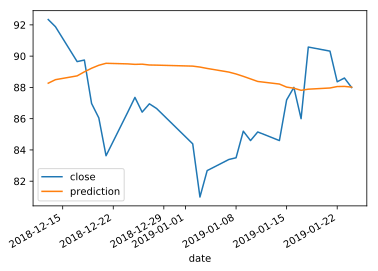

In [44]:
result['close'][1:].to_frame().reset_index().join(result.iloc[0].to_frame('prediction')).set_index('date').plot()

## 不同天数得分

In [45]:
def scores(stock_df,DAYS):
    stock_df_processed=create_new_df(stock_df,DAYS)
    stock_df_processed.shape
    columns_days=[column for column in stock_df_processed.columns if 'day_' in column]
    X=stock_df_processed[:-DAYS].drop(columns=columns_days)
    y=stock_df_processed[:-DAYS][columns_days]
    X.shape,y.shape
    _test_size = 0.2
    _shuffle = False  # 对于时间序列来说，不能把数据打乱
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=_shuffle, test_size=_test_size)
    X_train.shape,X_test.shape,y_train.shape,y_test.shape
    enet = ElasticNet()
    fit=enet.fit(X_train, y_train)
    return fit.score(X_test,y_test)

In [47]:
d={}
for i in range(5,60,5):
    d[i]=scores(stock_df,i)

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\si

{5: 0.9629078110749689,
 10: 0.9381809668825645,
 15: 0.9057827568368007,
 20: 0.8675514094947594,
 25: 0.8255160330023347,
 30: 0.7804364977588094,
 35: 0.7388864249638437,
 40: 0.7005697336518967,
 45: 0.6605301285180636,
 50: 0.6154384464621515,
 55: 0.5674539986044458}

In [48]:
d

{5: 0.9629078110749689,
 10: 0.9381809668825645,
 15: 0.9057827568368007,
 20: 0.8675514094947594,
 25: 0.8255160330023347,
 30: 0.7804364977588094,
 35: 0.7388864249638437,
 40: 0.7005697336518967,
 45: 0.6605301285180636,
 50: 0.6154384464621515,
 55: 0.5674539986044458}